<a href="https://colab.research.google.com/github/mn000000/Simulacion-1/blob/main/Camion_Transporte_Tinas_Ejercicio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análisis de Transporte de Tinas de Baño

## Problema
La empresa TIBASA, fabricante de tinas de baño, tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas. El peso de cada tina sigue la siguiente distribución de probabilidad triangular con vértices en 190, 210 y 230 kg.

### Parte 1: Probabilidad de Exceder la Capacidad del Camión
#### (a) Resolución Analítica
#### (b) Resolución por Simulación

### Parte 2: Análisis de Conveniencia de Adquirir un Nuevo Camión
#### (a) Resolución Analítica
#### (b) Resolución por Simulación


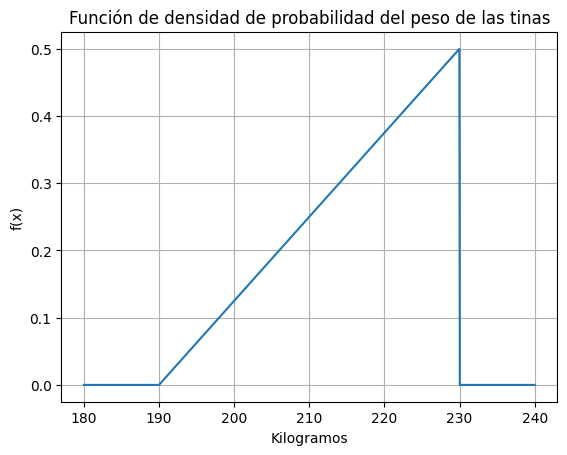

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de densidad de probabilidad (f(x))
def pdf(x):
    if 190 <= x <= 230:
        return 1/80 * (x - 190)
    else:
        return 0

# Generación de datos para la gráfica de la pdf
x = np.linspace(180, 240, 1000)
y = [pdf(i) for i in x]

# Graficar la función de densidad de probabilidad
plt.plot(x, y)
plt.title("Función de densidad de probabilidad del peso de las tinas")
plt.xlabel("Kilogramos")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()



## Parte 1: Probabilidad de que el peso de las tinas exceda la capacidad del camión

### (a) Resolución Analítica

Para una distribución triangular $X \sim Triangular(a, b, c)$:

- La media ($\mu$) está dada por:
  \[
  $\mu = \frac{a + b + c}{3}$
  \]

- La varianza $(\sigma^2)$ está dada por:
  \[
  $\sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}$
  \]

Donde:
- $a = 190$
- $b = 210$
- $c = 230$

Calculamos la media y la varianza:


In [2]:

# Parámetros de la distribución triangular
a, b, c = 190, 210, 230

# Cálculo de la media y varianza para una tina
mu = (a + b + c) / 3
sigma2 = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
sigma = np.sqrt(sigma2)

print(f"Media (mu) de una tina: {mu}")
print(f"Varianza (sigma^2) de una tina: {sigma2}")
print(f"Desviación estándar (sigma) de una tina: {sigma}")

# Cálculo para el peso total de 5 tinas
mu_total = 5 * mu
sigma_total = np.sqrt(5) * sigma

print(f"Media (mu) del peso total de 5 tinas: {mu_total}")
print(f"Desviación estándar (sigma) del peso total de 5 tinas: {sigma_total}")

# Probabilidad de que el peso total exceda 1000 kg (1 tonelada)
from scipy.stats import norm

# P(X > 1000)
prob = 1 - norm.cdf(1000, mu_total, sigma_total)
print(f"Probabilidad de que el peso de las tinas exceda la capacidad del camión: {prob}")


Media (mu) de una tina: 210.0
Varianza (sigma^2) de una tina: 66.66666666666667
Desviación estándar (sigma) de una tina: 8.16496580927726
Media (mu) del peso total de 5 tinas: 1050.0
Desviación estándar (sigma) del peso total de 5 tinas: 18.25741858350554
Probabilidad de que el peso de las tinas exceda la capacidad del camión: 0.9969150503397279



### (b) Resolución por Simulación

Utilizaremos un enfoque de Monte Carlo para simular el peso de 5 tinas y calcular la probabilidad de exceder la capacidad del camión.


In [3]:

# Simulación Monte Carlo
np.random.seed(42)
N = 100000  # Número de simulaciones

# Función para generar un peso de tina basado en la distribución triangular
def generate_tina_weight():
    return np.random.triangular(a, b, c)

# Generar pesos de 5 tinas en N simulaciones
weights = np.array([sum(generate_tina_weight() for _ in range(5)) for _ in range(N)])

# Calcular la probabilidad de exceder 1000 kg
prob_sim = np.mean(weights > 1000)
print(f"Probabilidad de exceder 1000 kg (simulación): {prob_sim}")


Probabilidad de exceder 1000 kg (simulación): 0.99753



## Parte 2: Análisis de conveniencia de adquirir un nuevo camión

### (a) Resolución Analítica

Calcularemos el costo anual de la alternativa de enviar una tina a través de otra compañía versus el costo de adquirir un nuevo camión.


In [4]:

# Costos
costo_envio = 200  # Costo de enviar una tina extra
costo_camion = 60000  # Costo anual de un nuevo camión
dias_trabajo = 5 * 52  # Días de trabajo en un año

# Cálculo de costos
costo_anual_envio = dias_trabajo * prob * costo_envio
print(f"Costo anual de envío de tinas adicionales: {costo_anual_envio}")
print(f"Costo anual de un nuevo camión: {costo_camion}")

if costo_anual_envio < costo_camion:
    print("Es más económico enviar las tinas adicionales a través de otra compañía.")
else:
    print("Es más económico adquirir un nuevo camión.")


Costo anual de envío de tinas adicionales: 51839.58261766585
Costo anual de un nuevo camión: 60000
Es más económico enviar las tinas adicionales a través de otra compañía.



### (b) Resolución por Simulación

Simularemos el costo anual basado en la probabilidad obtenida en la Parte 1.


In [5]:

# Cálculo del costo anual basado en simulación
costo_anual_envio_sim = dias_trabajo * prob_sim * costo_envio
print(f"Costo anual de envío de tinas adicionales (simulación): {costo_anual_envio_sim}")

if costo_anual_envio_sim < costo_camion:
    print("Es más económico enviar las tinas adicionales a través de otra compañía (simulación).")
else:
    print("Es más económico adquirir un nuevo camión (simulación).")


Costo anual de envío de tinas adicionales (simulación): 51871.56
Es más económico enviar las tinas adicionales a través de otra compañía (simulación).
